In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

# 1. Carregar os dados
df = pd.read_csv("data_tratada.csv")

### Transforma valores categóricos para numéricos

In [33]:
# 2. Codificar colunas categóricas
df_encoded = df.copy()

# 3. Remover linhas com valores ausentes (NaN)
df_encoded = df_encoded.dropna()

categorical_columns = df_encoded.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

for col, le in label_encoders.items():
  mapeamento = dict(zip(le.classes_, le.transform(le.classes_)))
  print(mapeamento)

{'Feminino': np.int64(0), 'Masculino': np.int64(1), 'Outro': np.int64(2), 'Prefiro não informar': np.int64(3)}
{'Amarela': np.int64(0), 'Branca': np.int64(1), 'Indígena': np.int64(2), 'Outra': np.int64(3), 'Parda': np.int64(4), 'Prefiro não informar': np.int64(5), 'Preta': np.int64(6)}
{'Não': np.int64(0), 'Prefiro não informar': np.int64(1), 'Sim': np.int64(2)}
{'Acre (AC)': np.int64(0), 'Alagoas (AL)': np.int64(1), 'Amapá (AP)': np.int64(2), 'Amazonas (AM)': np.int64(3), 'Bahia (BA)': np.int64(4), 'Ceará (CE)': np.int64(5), 'Distrito Federal (DF)': np.int64(6), 'Espírito Santo (ES)': np.int64(7), 'Goiás (GO)': np.int64(8), 'Maranhão (MA)': np.int64(9), 'Mato Grosso (MT)': np.int64(10), 'Mato Grosso do Sul (MS)': np.int64(11), 'Minas Gerais (MG)': np.int64(12), 'Paraná (PR)': np.int64(13), 'Paraíba (PB)': np.int64(14), 'Pará (PA)': np.int64(15), 'Pernambuco (PE)': np.int64(16), 'Piauí (PI)': np.int64(17), 'Rio Grande do Norte (RN)': np.int64(18), 'Rio Grande do Sul (RS)': np.int64(19)

### Padroniza os dados
Isso é feito para que o KMeans de importância para todos os dados da mesma forma

In [34]:
# 4. Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

### Método do cotovelo

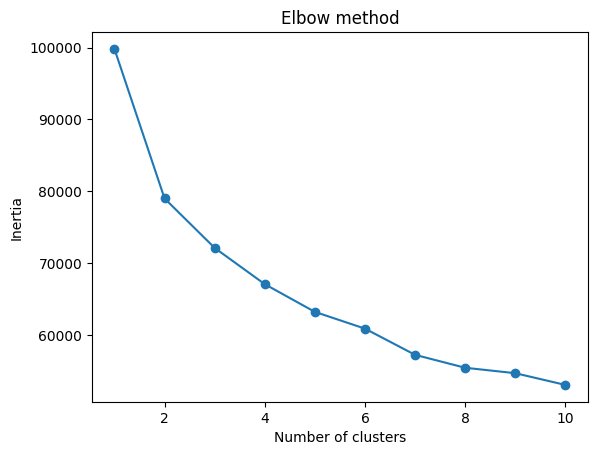

In [35]:
import matplotlib.pyplot as plt
inertias = []

# 5. Aplicar KMeans
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
  clusters = kmeans.fit_predict(X_scaled)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Treina o KMeans

In [44]:
# 5. Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 6. Adicionar a coluna de cluster
df_encoded["Cluster"] = clusters

rotulos = kmeans.labels_
print("Rótulos dos clusters:", rotulos)

centroides = kmeans.cluster_centers_
print("Centroides dos clusters:", centroides)

# Matriz de confusão
conf_matrix = confusion_matrix(df_encoded["Cluster"], clusters)
print("Matriz de confusão:")
print(conf_matrix)

cluster_labels = sorted(df_encoded["Cluster"].unique()) # Get unique cluster labels (0, 1, 2)
cnf_table = pd.DataFrame(conf_matrix,
                         index=[f"Cluster Real={c}" for c in cluster_labels],
                         columns=[f"Cluster Previsto={c}" for c in cluster_labels])
print(cnf_table)


Rótulos dos clusters: [1 1 1 ... 0 1 1]
Centroides dos clusters: [[-0.04810833  0.0228444   1.40172117  1.39255573  0.01099314 -0.0809202
  -0.21011936  0.57009865  0.38072631  0.63464735  0.52575658  0.56388946
  -0.02144292 -0.06398685 -0.03158451 -0.0668437  -0.02975104  0.03405519
  -0.02016485  0.00249944 -0.02294635]
 [ 0.01531095 -0.01987136 -0.6569418  -0.64815174 -0.03194477  0.32519247
   0.02733733  0.61060077  0.59113822  0.35928033  0.61224671  0.61111646
  -0.01158416  0.07964574 -0.00923832  0.04757262  0.02169458 -0.05693992
   0.02447255  0.11624551  0.05838313]
 [ 0.01654562  0.01538337 -0.0932473  -0.1009269   0.04868291 -0.52443085
   0.14518079 -1.65684718 -1.44466575 -1.25341987 -1.6186049  -1.65201817
   0.04132608 -0.0873271   0.04644036 -0.02551454 -0.01231661  0.07331359
  -0.02636383 -0.21672075 -0.08631652]]
Matriz de confusão:
[[1172    0    0]
 [   0 2322    0]
 [   0    0 1259]]
                Cluster Previsto=0  Cluster Previsto=1  Cluster Previsto=2
Cl

### Quantos dados foram treinados em cada cluster

In [45]:
# 7. Mostrar quantos dados em cada grupo
print(df_encoded["Cluster"].value_counts().sort_index())

Cluster
0    1172
1    2322
2    1259
Name: count, dtype: int64


### A média de cada coluna em cada cluster

In [38]:
df_encoded.groupby("Cluster").mean()

,Idade,Genero,Cor/Raca,Trabalho domestico,PCD,Estado onde mora,Região onde mora,Roubos de veículo,Roubos de carro,Roubos de moto,...,Roubos fora do domicilio,Nivel de ensino,Area de formação,Situação atual de trabalho,Cargo atual,Nivel,Faixa salarial,Tempo de experiencia,Forma de trabalho atual,Forma de trabalho ideal
Cluster,,,,,,,,,,,,,,,,,,,,,
0,31.530717,0.783276,4.469283,17.320137,0.048635,17.481229,2.544369,89.494027,56.976109,32.290102,...,547.230375,3.364334,3.914676,1.248294,6.912969,1.636519,8.970990,3.387372,1.412116,1.941126
1,31.991817,0.764427,0.957364,16.524763,0.036176,20.201981,2.798450,90.891473,62.565891,28.224806,...,557.139535,3.384582,4.288975,1.278639,7.540913,1.694229,8.625754,3.477175,1.524978,2.021533
2,32.000794,0.779984,1.918983,16.738046,0.059571,14.509929,2.924543,12.657665,8.482923,4.416203,...,82.289118,3.493249,3.853852,1.354249,7.139793,1.656076,9.119936,3.374901,1.194599,1.878475


### Exibição do gráfico

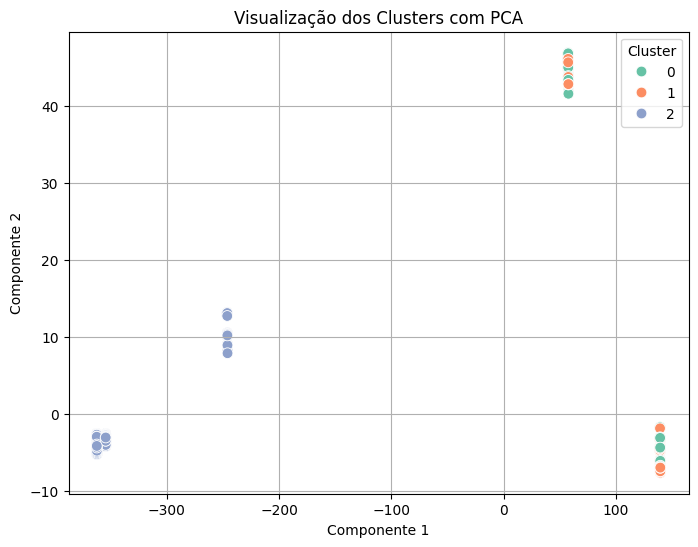

In [39]:
from sklearn.decomposition import PCA
import seaborn as sns

# Supondo que df_encoded já tem os dados padronizados e com 'Cluster'

# Remover a coluna "Cluster" antes do PCA
X = df_encoded.drop("Cluster", axis=1)

# Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reduzir de n dimensões para 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os componentes e o cluster
pca_df = pd.DataFrame(X_pca, columns=["Componente 1", "Componente 2"])
pca_df["Cluster"] = df_encoded["Cluster"].values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="Componente 1", y="Componente 2", hue="Cluster", palette="Set2", s=60)
plt.title("Visualização dos Clusters com PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
